<a href="https://colab.research.google.com/github/18-RAJAT/Stock-Price-Prediction/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Rajat joshi
import os #intract with os
import pandas_datareader as pdr#tingo

In [ ]:
#historical stock data for the ticker symbol "AAPL" from the financial market data provider Tiingo
df = pdr.get_data_tiingo('AAPL', api_key=("c59339267c4df5911e27f1f5606230ed00977a5f"))#AAPL data
df.head()

/usr/local/lib/python3.8/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-01-29 00:00:00+00:00  167.96  170.16  167.07  170.16  48434424   
       2018-01-30 00:00:00+00:00  166.97  167.37  164.70  165.53  45137026   
       2018-01-31 00:00:00+00:00  167.43  168.44  166.50  166.87  30984099   
       2018-02-01 00:00:00+00:00  167.78  168.62  166.76  167.17  38099665   
       2018-02-02 00:00:00+00:00  160.50  166.80  160.10  166.00  85436075   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-01-29 00:00:00+00:00  39.876026  40.398336  39.664727  40.398336   
       2018-01-30 00:00:00+00:00  39.640986  39.735952  39.102057  39.299110   
       2018-01-31 00:00:00+00:00  39.750196  39.989984  39.529402  39.617245   
       2018-02-01 00:00:00+00:00  39.833291  40.032719  39.591129  39.688469   
       2018-02-02 00:00:00+00:00  38.104919  39.600626  38.009953  39.410695   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-01-29 00:00:00+00:00  193737696      0.0          1.0  
       2018-01-30 00:00:00+00:00  180548104      0.0          1.0  
       2018-01-31 00:00:00+00:00  123936396      0.0          1.0  
       2018-02-01 00:00:00+00:00  152398660      0.0          1.0  
       2018-02-02 00:00:00+00:00  341744300      0.0          1.0

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-01-29 00:00:00+00:00,167.96,170.16,167.07,170.16,48434424,39.876026,40.398336,39.664727,40.398336,193737696,0.0,1.0
1,AAPL,2018-01-30 00:00:00+00:00,166.97,167.37,164.70,165.53,45137026,39.640986,39.735952,39.102057,39.299110,180548104,0.0,1.0
2,AAPL,2018-01-31 00:00:00+00:00,167.43,168.44,166.50,166.87,30984099,39.750196,39.989984,39.529402,39.617245,123936396,0.0,1.0
3,AAPL,2018-02-01 00:00:00+00:00,167.78,168.62,166.76,167.17,38099665,39.833291,40.032719,39.591129,39.688469,152398660,0.0,1.0
4,AAPL,2018-02-02 00:00:00+00:00,160.50,166.80,160.10,166.00,85436075,38.104919,39.600626,38.009953,39.410695,341744300,0.0,1.0


In [ ]:
df1=df.reset_index()['close']#close column

In [ ]:
df1

0       167.96
1       166.97
2       167.43
3       167.78
4       160.50
         ...  
1254    141.11
1255    142.53
1256    141.86
1257    143.96
1258    145.93
Name: close, Length: 1259, dtype: float64

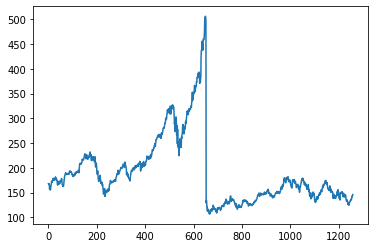

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#minmax use to scale the values of feature in a
scaler=MinMaxScaler(feature_range=(0,1)) 
#data set to a given range between[0,1)
#2D array shape (-1,1) and fitTrans scaling the data
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.15308704]
 [0.15060739]
 [0.15175955]
 ...
 [0.08771446]
 [0.09297433]
 [0.09790858]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)#.65 is means that 65% of the data will be uesd for training
test_size=len(df1)-training_size#calculates the size of the test set by subtracting 
#the training size from the total size of the dataframe.
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]#array slicing


In [ ]:
print(test_data)

[[0.06672511]
 [0.06166562]
 [0.0643707 ]
 [0.05262367]
 [0.05324984]
 [0.05735755]
 [0.05853475]
 [0.05011897]
 [0.04776456]
 [0.03989981]
 [0.04541014]
 [0.05162179]
 [0.04866625]
 [0.04510958]
 [0.04470883]
 [0.05127113]
 [0.0465623 ]
 [0.05074515]
 [0.05024421]
 [0.05011897]
 [0.0461866 ]
 [0.04450845]
 [0.0436819 ]
 [0.04563557]
 [0.04182843]
 [0.04771446]
 [0.04773951]
 [0.04984346]
 [0.05082029]
 [0.0482655 ]
 [0.05137132]
 [0.05921102]
 [0.05710708]
 [0.05838447]
 [0.06249217]
 [0.05916093]
 [0.06376957]
 [0.06797746]
 [0.06727614]
 [0.06654978]
 [0.06579837]
 [0.06998121]
 [0.07386349]
 [0.07544145]
 [0.07621791]
 [0.08295554]
 [0.08811522]
 [0.09450219]
 [0.09117095]
 [0.09585473]
 [0.09432686]
 [0.09718222]
 [0.1059737 ]
 [0.10429555]
 [0.09906074]
 [0.08919224]
 [0.09845961]
 [0.09658109]
 [0.10008766]
 [0.10449593]
 [0.10557295]
 [0.10001252]
 [0.09552912]
 [0.09718222]
 [0.09773325]
 [0.09688165]
 [0.10149029]
 [0.10046337]
 [0.10073889]
 [0.09843456]
 [0.09830933]
 [0.09

In [ ]:
training_size,test_size
test_data.shape #return the shape of td

(441, 1)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []# ip,op train,test
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100  reach the data set
		dataX.append(a)#here---->>>>inserts a single element into an existing list
		dataY.append(dataset[i + time_step, 0])
		#dataX and dataY into numpy arrays and return them
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
#train_data, time_step returns
#two numpy arrays, dx&dy, which are then assigned to the variables xt&yt.
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)


(717, 100)
(717,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)


(340, 100)
(340,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM 3D
#CNN->appropriate format for input into a specific type of machine learning model
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
#Algo 

model=Sequential()
#add 50 units of lstm layers and sets the return seq parameter true. layer of seq. of 100 
#timestamps elements each with 1 feature
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))

#LSTM layer will be a single vector and it will not be passed as input to any other layer
model.add(LSTM(50))
model.add(Dense(1))#fully connected layer with 1 unit.->o/p layer of the model

#loss->measure the performance during training optimizer
#optimizer->used to update the weights of the model based on the loss func. 
#->recursion weight/bias update <- rev



#The loss argument is the metric to be used to evaluate the model's performance,
#and the optimizer argument is the optimization algorithm to be used

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
#gradiant descent->stochastic gradient->mini-batch->momentum based.

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_40 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_41 (LSTM)              (None, 50)                20200     
                                                                 
 dense_13 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:

##classification->acc. || Regression->MSE



#The ->epochs argument is set to 100, which means that the training process will 
#iterate over the entire dataset 100 times.

#The ->batch_size argument is set to 64, which means that the model will update 
#its parameters after processing 64 training samples.

#The ->verbose, is set to 1, which means that the model will print out the progress
# of the training process as it goes.

#100 time itr,update after 64 training smaples,progress of the training data
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)
#for->back tst then 1 epoc cycle

Epoch 1/100
12/12 [==============================] - 7s 245ms/step - loss: 0.0360 - mse: 0.0360 - val_loss: 8.4768e-04 - val_mse: 8.4768e-04
Epoch 2/100
12/12 [==============================] - 2s 152ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 3/100
12/12 [==============================] - 2s 152ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 8.8770e-04 - val_mse: 8.8770e-04
Epoch 4/100
12/12 [==============================] - 2s 151ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 5.9283e-04 - val_mse: 5.9283e-04
Epoch 5/100
12/12 [==============================] - 2s 151ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 5.3618e-04 - val_mse: 5.3618e-04
Epoch 6/100
12/12 [==============================] - 2s 153ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 7/100
12/12 [==============================] - 2s 149ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 3.2367e-04 - val_mse: 3.2367e-04
Epoch 8/100
12/12 [==========

In [ ]:
import tensorflow as tf


In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 28ms/step


In [ ]:
##Transformback to original form
##interpretation and comparsion

#to transform the predicted values back to their original scale ->error find

train_predict=scaler.inverse_transform(train_predict)

#used to undo the scaling that was applied to the data during preprocessing
test_predict=scaler.inverse_transform(test_predict)


In [ ]:
### Calculate RMSE performance metrics-> root mean squared error
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))#MSE THEN sqrt convert into RMSE

226.6188518467549

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))#MSE resulting->RMSE  Accu.<RMSE180

154.46699822422198

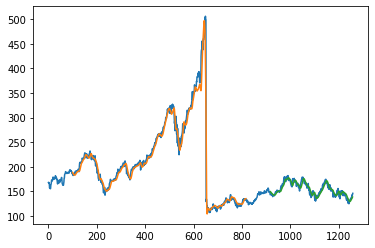

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan #value filling with NaN->Not a Number
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
#G->pred
#B->complete data
#O->training

In [ ]:
len(test_data)
# print(test_data)

441

In [ ]:
x_input=test_data[341:].reshape(1,-1)#<- close prev data
x_input.shape

(1, 100)

In [ ]:
len(x_input)

1

In [ ]:
#this is used to make pred with a model,or used to data preprocessing
temp_input=list(x_input)#new lst
temp_input=temp_input[0].tolist()#1st ele access and convert into lst using tolst
print(len(temp_input))

100


In [ ]:
#30 days prediction
lst_output=[]
n_steps=100
i=0
#loop runs for 30 iterations
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

[0.08523837]
101
1 day input [0.12303068 0.11927364 0.1265623  0.14174076 0.11772073 0.12140263
 0.11403882 0.10985598 0.11932373 0.1253851  0.11742016 0.11496556
 0.10917971 0.11003131 0.11251096 0.10770194 0.08926738 0.07854728
 0.08919224 0.09833438 0.09908579 0.09665623 0.08328115 0.0841077
 0.08050094 0.07889793 0.09054477 0.07899812 0.08909205 0.09244834
 0.09272386 0.09154665 0.10126487 0.10672511 0.11396368 0.10647464
 0.09507827 0.12247965 0.11646838 0.10973075 0.09565435 0.08025047
 0.07899812 0.08035066 0.08180338 0.07020664 0.10026299 0.10735128
 0.10379461 0.10820288 0.10507201 0.10990607 0.11133375 0.10311835
 0.10855354 0.11078272 0.10336882 0.09362555 0.08598622 0.10316844
 0.10386976 0.10261741 0.09966187 0.0903444  0.08541014 0.08969317
 0.08846587 0.09430182 0.09675642 0.0910958  0.07428929 0.06930495
 0.0639449  0.06376957 0.07165936 0.06359424 0.0626675  0.05808391
 0.04809017 0.05703193 0.05783344 0.04566061 0.04889167 0.04553538
 0.05705698 0.05838447 0.05983719 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)#<-close column sz

1259

In [ ]:
# plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
# plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
# df3=df1.tolist()
# df3.extend(lst_output)#30 days op inc
# plt.plot(df3[1200:])#->total 1258-1200 ->58+30(pred)=88

In [ ]:
# df3=scaler.inverse_transform(df3).tolist()

In [ ]:
# plt.plot(df3)

In [ ]:
# final_data = scaler.inverse_transform(test_data)
#print(final_data)

In [ ]:
#final model
g_input=test_data[340:].reshape(1,-1)#340->440 inset g_ip form in array
g_input.shape
# print(g_input)

final_input=list(g_input)
final_input=final_input[0].tolist()
# print(len(final_input))

from numpy import array
def predictor(duration,final_input,g_input):
  lst_output=[]
  n_steps=100
  i=0
  while(i<duration):
      
      if(len(final_input)>100):
          #print(temp_input)
          g_input=np.array(final_input[1:])
          # print("{} day input {}".format(i,x_input))
          g_input=g_input.reshape(1,-1)
          g_input = g_input.reshape((1, n_steps, 1))
          #print(x_input)
          yhat = model.predict(g_input, verbose=0)
          # print("{} day output {}".format(i,yhat))
          yhat=scaler.inverse_transform(yhat)#main values convert actual value
          yhat = yhat.reshape(1,-1)
          final_input.extend(yhat[0].tolist())
          final_input=final_input[1:]
          #print(temp_input)
          lst_output.extend(yhat.tolist())
          i=i+1
      else:
          g_input = g_input.reshape((1, n_steps,1))
          yhat = model.predict(g_input, verbose=0)
          # print(yhat[0])
          yhat=scaler.inverse_transform(yhat)
          yhat = yhat.reshape(1,-1)
          final_input.extend(yhat[0].tolist())
          # print(len(final_input))
          lst_output.extend(yhat.tolist())
          i=i+1
  return lst_output

#predicting values

duration =int(input("Enter the no. of duration to predict : "))
#call
prediction = predictor(duration,final_input,g_input)#test data size 440<- last 440 values (test data)
print("Predicted values are : ",prediction)

Enter the no. of duration to predict : 20
Predicted values are :  [[140.63014221191406], [383.8900451660156], [775.8746948242188], [1075.0457763671875], [1206.38720703125], [1225.5465087890625], [1193.41357421875], [1148.74658203125], [1113.3741455078125], [1095.7596435546875], [1095.435302734375], [1107.927978515625], [1127.96435546875], [1150.80029296875], [1172.6466064453125], [1190.897705078125], [1204.2620849609375], [1212.6265869140625], [1216.6370849609375], [1217.2362060546875]]


In [ ]:
# import pickle 
# pickle.out = open("Model.pkl",'wb')
# pickle.dump(model,pickle.out)
# pickle.out.close()

In [ ]:
# pickle.dump(test_data,open('test_data.pkl','wb'))

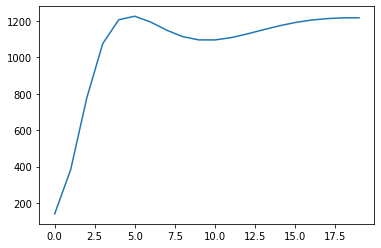

In [ ]:
plt.plot(prediction)
plt.show()

In [ ]:
#Revert